###CLUSTERING: KMeans

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939433 sha256=2fe231a0d9b782d0a18f88940e41a367a509149dc1da91b419d89c17bec112a4
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [3]:

from pydataset import data

initiated datasets repo at: /root/.pydataset/


In [4]:


# Carga del datset
iris_original = data('iris')
# Copia para luego validar
iris = iris_original.copy()
# Se eliminan las etiquetas
del iris['Species']

# Asignación de colores
iris_original['Color']='red' # Nueva columna con el color
iris_original.loc[iris_original.Species == "setosa",'Color']='green'
iris_original.loc[iris_original.Species == "versicolor",'Color']='blue'
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

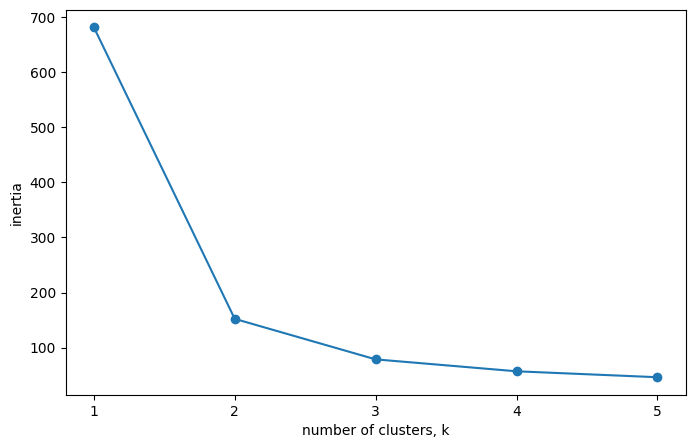

In [6]:
ks = range(1, 6)
inertias = []
for k in ks:
# Genera un modelo para KMeans con k clústeres
    model = KMeans(k)
# Ajusta el modelo a las muestras
    model.fit(iris)
# Agrega las inercias calculadas
    inertias.append(model.inertia_) 
# Gráfico de inercias vs. número de clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [7]:
# Create a KMeans instance with k clusters: model
model = KMeans(3)
   
# Fit model to samples
#model.fit(iris)
labels = model.fit_predict(iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [9]:
iris_original['Cluster']= labels

In [10]:
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster
1,5.1,3.5,1.4,0.2,setosa,green,0
2,4.9,3.0,1.4,0.2,setosa,green,0
3,4.7,3.2,1.3,0.2,setosa,green,0
4,4.6,3.1,1.5,0.2,setosa,green,0
5,5.0,3.6,1.4,0.2,setosa,green,0


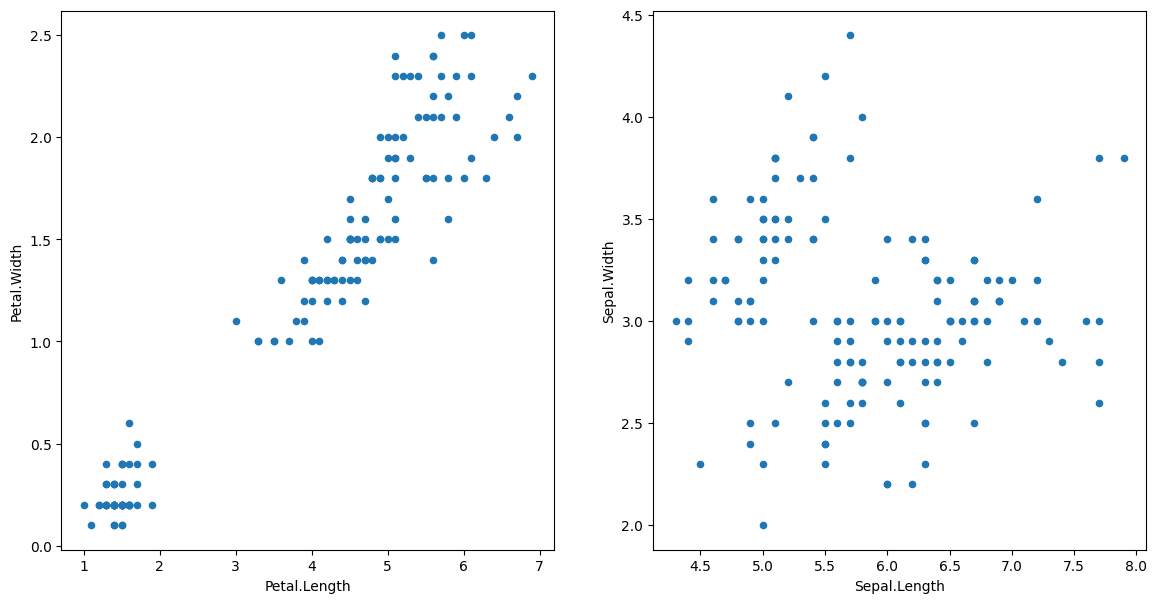

In [11]:

from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

fig, axes = plt.subplots(nrows=1, ncols=2)

iris_original.plot(ax=axes[0],x='Petal.Length', y='Petal.Width',
         kind='scatter')
iris_original.plot(ax=axes[1],x='Sepal.Length', y='Sepal.Width',
         kind='scatter')
plt.show()

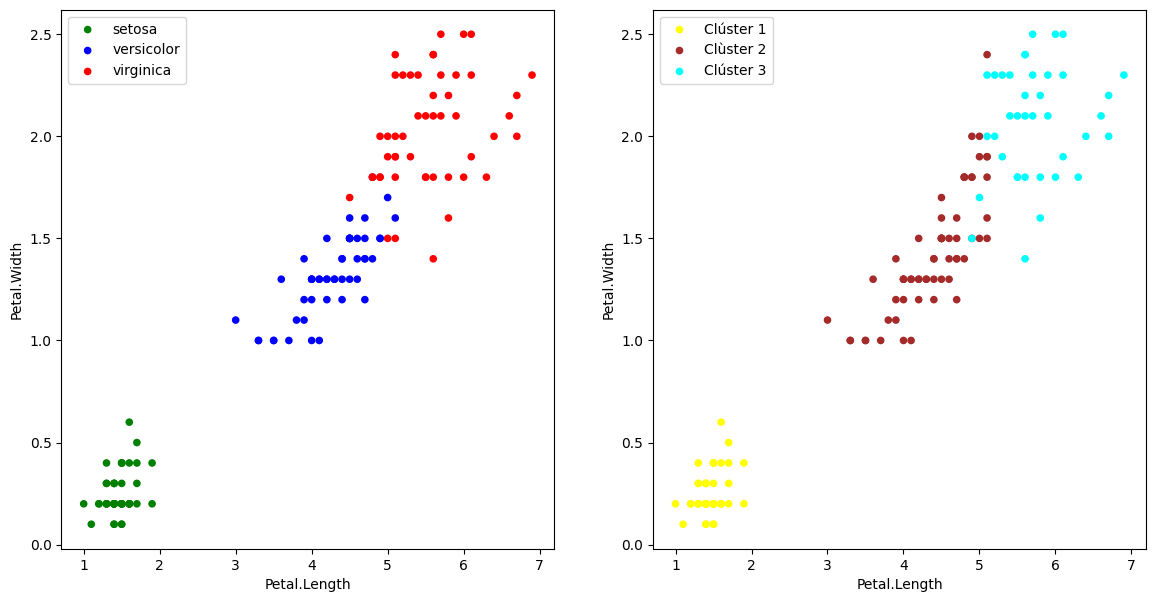

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

fig, axes = plt.subplots(nrows=1, ncols=2)

specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')

ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 

iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 2,'Color2']='cyan'

cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 2,:]
ax2=cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')

ax2.legend(('Clúster 1','Clùster 2','Clúster 3'), loc='best') 

plt.show()

In [13]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])

In [14]:
print(ct)

Cluster      0   1   2
Species               
setosa      50   0   0
versicolor   0  48   2
virginica    0  14  36


In [15]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


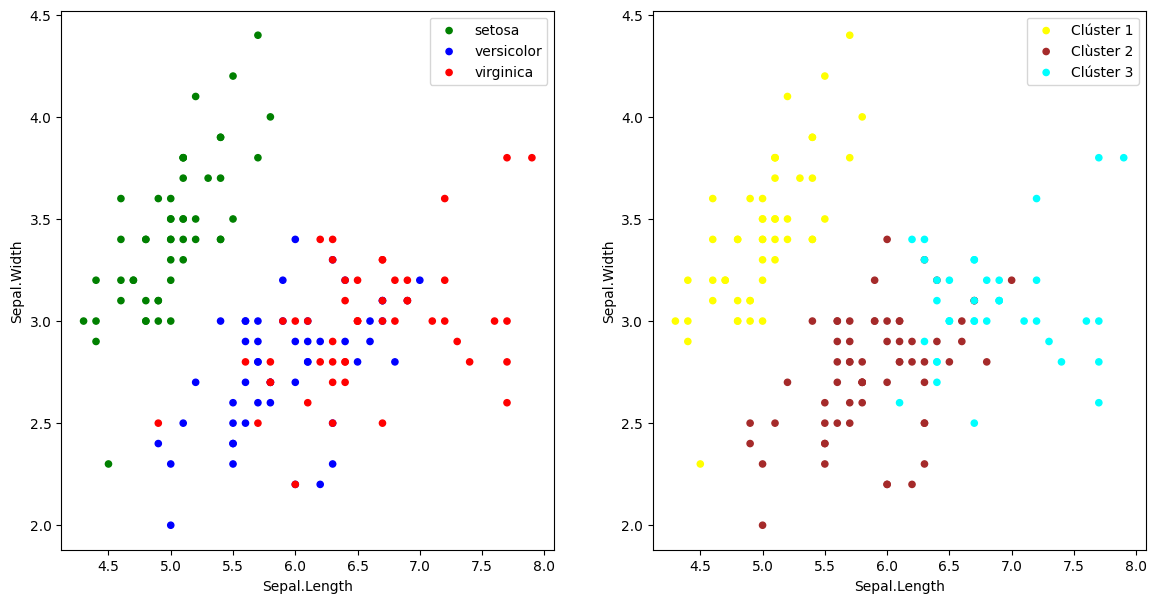

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

fig, axes = plt.subplots(nrows=1, ncols=2)

specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 

iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 2,'Color2']='cyan'

cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 2,:]
ax2=cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')

ax2.legend(('Clúster 1','Clùster 2','Clúster 3'), loc='best') 


plt.show()